In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [285]:
# Load the data into a pandas DataFrame
# https://www.kaggle.com/datasets/andrewmvd/divorce-prediction
df = pd.read_csv('divorce_data.csv', delimiter=';')

In [286]:
# Split the data into features and target
X = df[['Q{}'.format(i) for i in range(1, 55)]]
y = df['Divorce']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the DT model
dt_model.fit(X_train, y_train)

# Build the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the LR model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [288]:
# Get the feature importances from the Decision Tree Model
feature_importances = dt_model.feature_importances_

# Sort the feature importances in descending order
sorted_importances = np.argsort(feature_importances)[::-1]

# Get the top 10 features
top_10 = sorted_importances[:10]

# Print the top 10 features
print("Feature\t\tImportance")
print("------------------------")
for feature in top_10:
    print(f"Q{feature+1}\t\t{feature_importances[feature]:.2f}")


Feature		Importance
------------------------
Q38		0.93
Q40		0.03
Q28		0.03
Q25		0.00
Q23		0.00
Q22		0.00
Q21		0.00
Q20		0.00
Q19		0.00
Q18		0.00


In [289]:

# Get the coefficients of the features from Logistic Regression Model
coefficients = lr_model.coef_

# Flatten the coefficients array to a 1D array
coefficients = coefficients.flatten()

# Get the feature names
lr_feature_names = X.columns

# Zip the feature names and coefficients together and sort the features in descending order of importance
lr_feature_importance = sorted(dict(zip(lr_feature_names, coefficients)).items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
lr_top_10_features = lr_feature_importance[:10]

# Print the feature importance
print("Feature\t\tCoefficient")
print("------------------------")
for feature, importance in lr_top_10_features:
    print(f"{feature}\t\t{importance.item():.2f}")


Feature		Coefficient
------------------------
Q40		0.62
Q26		0.58
Q49		0.54
Q3		0.50
Q31		0.43
Q44		0.41
Q20		0.41
Q39		0.39
Q17		0.37
Q6		0.37


In [290]:
# Split the data into important features and same target
dt_X = df[['Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q25', 'Q28', 'Q40', 'Q38']]
dt_y = df['Divorce']

# Split the new data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dt_X, dt_y, test_size=0.3, random_state=42)

# Scale the data with a new scaler
dt_scaler = StandardScaler()
X_train = dt_scaler.fit_transform(X_train)
X_test = dt_scaler.transform(X_test)

# Build the updated Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the DT model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [291]:
# Decision Tree Prediction (Binary Output: 1 = Divorce | 0 = No Divorce)
def dt_predict_churn(F1, F2, F3, F4, F5, F6, F7, F8, F9, F10):
    # Scale the input data
    X_input = dt_scaler.transform([[F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]])
    
    # Make a prediction
    prediction = dt_model.predict(X_input)[0]
    
    return prediction

Accuracy: 0.88
[[21  4]
 [ 2 24]]


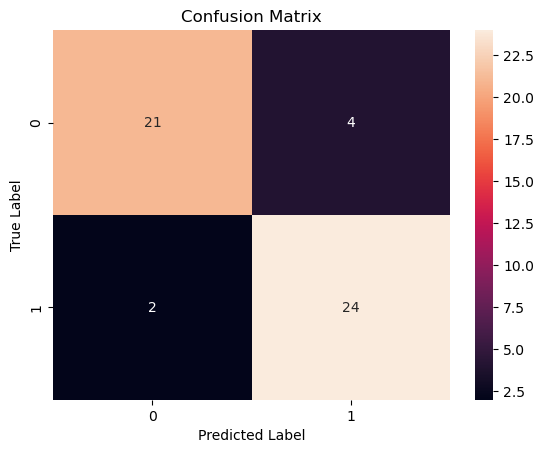

In [292]:
# Get the accuracy on the test set
accuracy = dt_model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.2f}")

# Predict the labels on the test set
y_pred = dt_model.predict(X_test)

# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [293]:
# Test the function
print(dt_predict_churn(1,1,2,2,0,1,3,1,1,2))

1


/Users/franklinle/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [294]:
# Split the data into important features and same target
lr_X = df[['Q6', 'Q17', 'Q39', 'Q20', 'Q44', 'Q31', 'Q3', 'Q49', 'Q26', 'Q40']]
lr_y = df['Divorce']

# Split the new data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lr_X, lr_y, test_size=0.3, random_state=42)

# Scale the data with a new scaler
lr_scaler = StandardScaler()
X_train = lr_scaler.fit_transform(X_train)
X_test = lr_scaler.transform(X_test)

# Build the updated Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the LR model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [295]:
def lr_predict_churn(F1, F2, F3, F4, F5, F6, F7, F8, F9, F10):
    # Scale the input data
    X_input = lr_scaler.transform([[F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]])   
    
    # Make a prediction
    probability = lr_model.predict_proba(X_input)[0][1]

    return probability

Accuracy: 0.98
[[25  0]
 [ 1 25]]


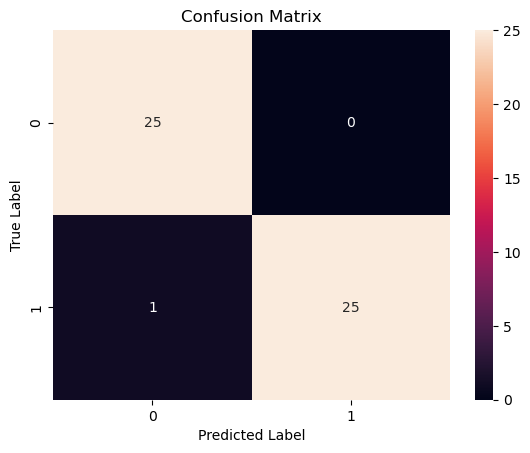

In [296]:
# Get the accuracy on the test set
accuracy = lr_model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.2f}")

# Predict the labels on the test set
y_pred = lr_model.predict(X_test)

# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [297]:
# Test the function
print(lr_predict_churn(1,3,0,2,1,1,1,2,1,2))

0.4934425183021563


/Users/franklinle/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
